In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import fbeta_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [59]:
base_dataset = pd.read_excel('AirQualityUCI.xlsx')
base_dataset.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [60]:
base_dataset.shape

(9357, 15)

In [61]:
base_dataset.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866
9356,2005-04-04,14:00:00,2.2,1070.75,-200,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804


In [62]:
#数据预处理
r_dataset = base_dataset[base_dataset>0].dropna()
r_dataset.shape

(827, 15)

In [63]:
y1 = r_dataset['CO(GT)']
x1 = r_dataset[['PT08.S1(CO)','AH','PT08.S5(O3)','PT08.S4(NO2)','PT08.S3(NOx)']]
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=30)
LR = LinearRegression().fit(x1_train, y1_train)

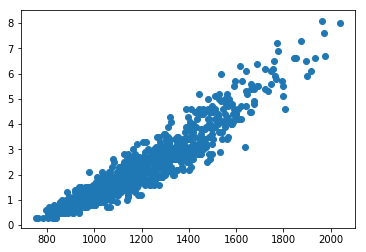

In [64]:
plt.scatter(x1['PT08.S1(CO)'], y1)

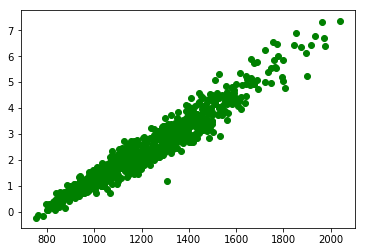

In [65]:
plt.scatter(x1['PT08.S1(CO)'], LR.predict(x1),c='g')

In [66]:
s_train = LR.score(x1_train, y1_train)
s_test = LR.score(x1_test,y1_test)

print("(多种气体观测值预测)")
print("LinearRegression 对CO(GT)预测:")
print ("训练集Accuracy: {:.4f}".format(LR.score(x1_train, y1_train)))
print ("测试集Accuracy: {:.4f}".format(LR.score(x1_test, y1_test)))

(多种气体观测值预测)
LinearRegression 对CO(GT)预测:
训练集Accuracy: 0.9386
测试集Accuracy: 0.9437


In [67]:
y2 = r_dataset['NOx(GT)']
x1 = r_dataset[['PT08.S1(CO)','AH','PT08.S5(O3)','PT08.S4(NO2)','PT08.S3(NOx)']]
x2_train, x2_test, y2_train, y2_test = train_test_split(x1, y2, test_size=0.2, random_state=36)

LR = LinearRegression().fit(x2_train, y2_train)

s_train = LR.score(x2_train, y2_train)
s_test = LR.score(x2_test,y2_test)

print("LinearRegression 对NOx(GT)预测:")
print ("训练集Accuracy: {:.4f}".format(LR.score(x2_train, y2_train)))
print ("测试集Accuracy: {:.4f}".format(LR.score(x2_test, y2_test)))

LinearRegression 对NOx(GT)预测:
训练集Accuracy: 0.9056
测试集Accuracy: 0.9069


In [68]:
y1 = r_dataset['CO(GT)']
x1 = r_dataset[['PT08.S1(CO)']]
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=36)
LR = LinearRegression().fit(x1_train, y1_train)
s_train = LR.score(x1_train, y1_train)
s_test = LR.score(x1_test,y1_test)

print("(一种气体观测值预测)")
print("LinearRegression 对CO(GT)预测:")
print ("训练集Accuracy: {:.4f}".format(LR.score(x1_train, y1_train)))
print ("测试集Accuracy: {:.4f}".format(LR.score(x1_test, y1_test)))

(一种气体观测值预测)
LinearRegression 对CO(GT)预测:
训练集Accuracy: 0.8747
测试集Accuracy: 0.8810
